<a href="https://colab.research.google.com/github/if-not-SPAM/ML_projects/blob/main/ml_prj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn import metrics

In [ ]:
data=pd.read_csv("car data.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(data.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [ ]:
print(data.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


#Encoding

In [ ]:
data.replace({"Fuel_Type":{"Petrol":0,"Diesel":1,"CNG":2}},inplace=True)
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,1,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,1,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,0,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,0,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,1,Dealer,Manual,0


In [ ]:
data.replace({"Seller_Type":{"Dealer":0,"Individual":1}},inplace=True)
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,Manual,0
297,brio,2015,4.00,5.90,60000,0,0,Manual,0
298,city,2009,3.35,11.00,87934,0,0,Manual,0
299,city,2017,11.50,12.50,9000,1,0,Manual,0


In [ ]:
data.replace({"Transmission":{"Manual":0,"Automatic":1}},inplace=True)
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [ ]:
x=data.drop(["Car_Name","Selling_Price"],axis=1)

In [ ]:
x


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [ ]:
y=data["Selling_Price"]

In [ ]:
y


0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
test_pred=model.predict(x_test)

In [ ]:
train_pred=model.predict(x_train)


In [ ]:
err=metrics.r2_score(y_train,train_pred)
print("R sq. error:",err)#diff in pred train data and actual data

R sq. error: 0.8799451660493711


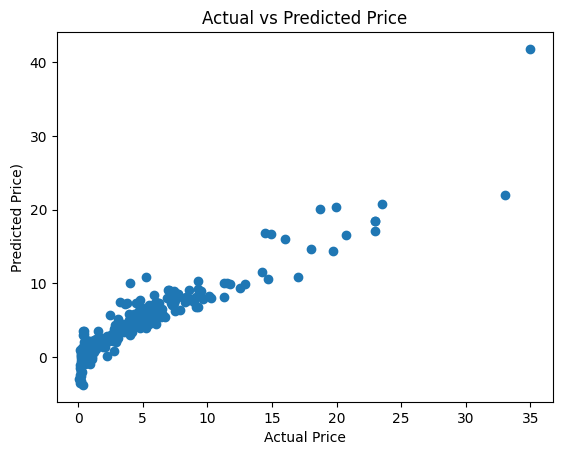

In [ ]:
plt.scatter(y_train,train_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price)")
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
err=metrics.r2_score(y_test,test_pred)
print("R sq. error:",err)#diff in pred test data and actual data

R sq. error: 0.8365766715027051


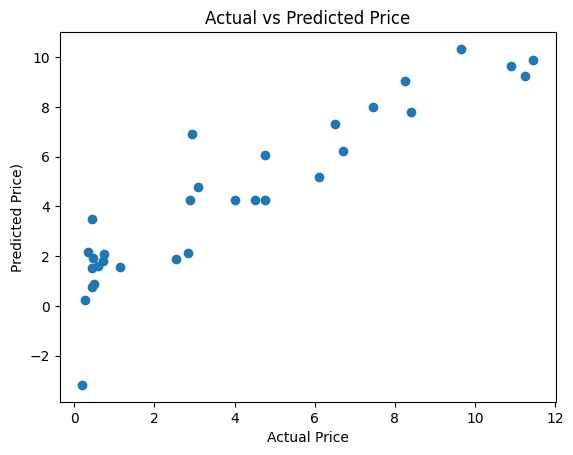

In [ ]:
plt.scatter(y_test,test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price)")
plt.title("Actual vs Predicted Price")
plt.show()

In [ ]:
l=Lasso()

In [ ]:
l.fit(x_train,y_train)

Lasso()

In [ ]:
new_test_pred=l.predict(x_test)

In [ ]:
err=metrics.r2_score(y_test,new_test_pred)
print("R sq. error:",err)#diff in pred test data and actual data

R sq. error: 0.8709167941173195


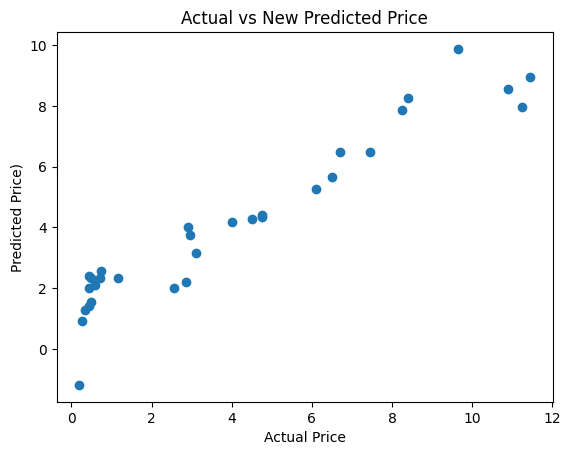

In [ ]:
plt.scatter(y_test,new_test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price)")
plt.title("Actual vs New Predicted Price")
plt.show()